### import liabraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement

### Data Gathering

In [5]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\medical_insurance (1).csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


### EDA (Exploratory Data Analysis)

In [7]:
# check  for basic info

df.shape

(2772, 7)

In [9]:
df.size

19404

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
# information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [15]:
# statistical information

df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
# check for missing values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

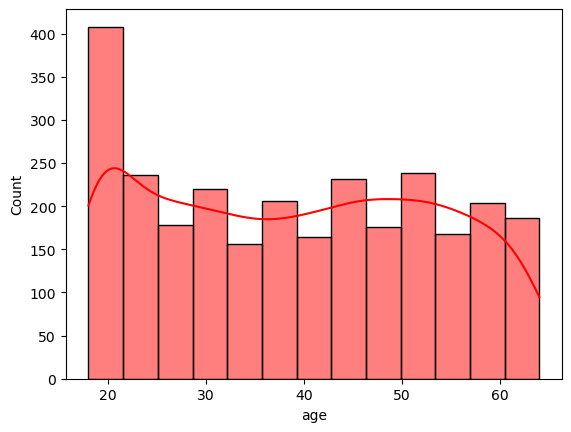

In [19]:
# age column : univariate analysis


sns.histplot(df["age"], kde= True, color = "red")

<Axes: >

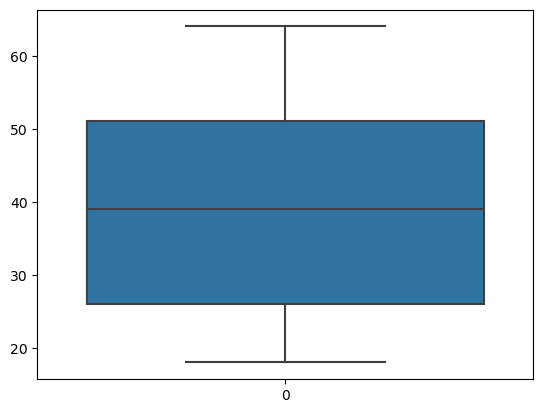

In [40]:
# check for the outliers - extreme datapoints

sns.boxplot(df["age"])


In [15]:
# sex column

df["sex"].replace({"female":1, "male":0}, inplace = True)

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,no,southeast,8569.86180
2768,21,1,34.600,0,no,southwest,2020.17700
2769,19,0,26.030,1,yes,northwest,16450.89470
2770,23,0,18.715,0,no,northwest,21595.38229


In [17]:
df["sex"].value_counts()

sex
0    1406
1    1366
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

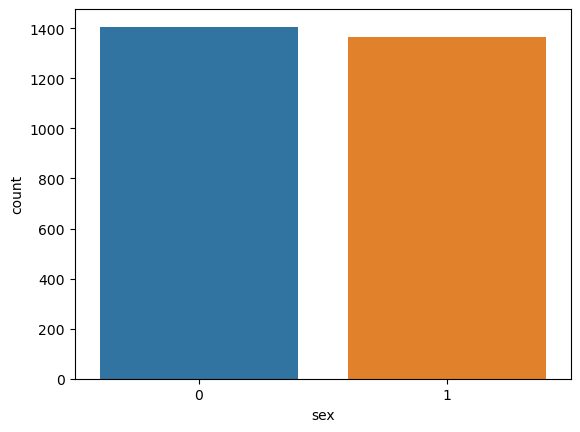

In [21]:
sns.countplot(x = df["sex"])

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

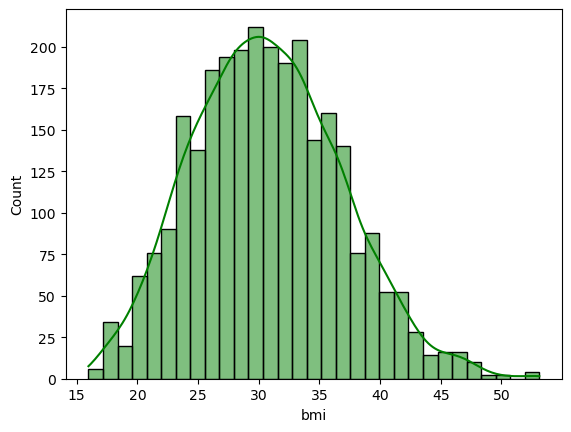

In [22]:
# univariate analysis
sns.histplot(df["bmi"], color = "green", kde = True)

<Axes: >

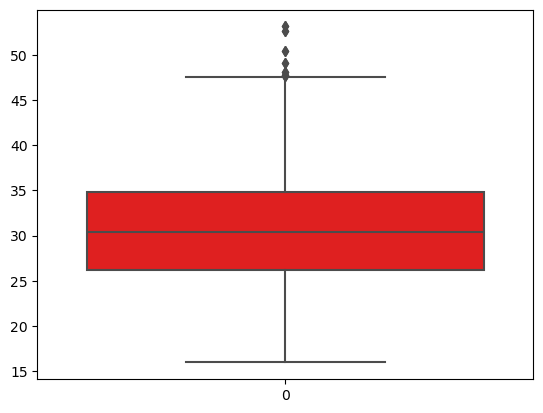

In [41]:
sns.boxplot(df["bmi"], color = "red")

In [45]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)

#Interquantile Range

lowertail = q1-1.5*iqr
uppertail = q3+1.5*iqr

In [47]:
lowertail

13.394999999999992

In [48]:
uppertail

47.59500000000001

In [52]:
df["bmi"] > uppertail

0       False
1       False
2       False
3       False
4       False
        ...  
2767    False
2768    False
2769    False
2770    False
2771    False
Name: bmi, Length: 2772, dtype: bool

In [51]:
outliers = df[df["bmi"] > uppertail]
outliers

,age,sex,bmi,children,smoker,region,charges
116,58,0,49.06,0,0,2,11381.3254
286,46,1,48.07,2,0,4,9432.9253
847,23,0,50.38,1,0,2,2438.0552
860,37,1,47.60,2,1,1,46113.5110
1047,22,0,52.58,1,1,2,44501.3982
1088,52,0,47.74,1,0,2,9748.9106
1317,18,0,53.13,0,0,2,1163.4627
1502,58,0,49.06,0,0,2,11381.3254
1672,46,1,48.07,2,0,4,9432.9253
2233,23,0,50.38,1,0,2,2438.0552


In [53]:
outliers.index

Index([116, 286, 847, 860, 1047, 1088, 1317, 1502, 1672, 2233, 2246, 2433,
       2474, 2703],
      dtype='int64')

In [56]:
for i in outliers.index:
    df.iloc[i,2] = uppertail

In [23]:
df["children"].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='children'>

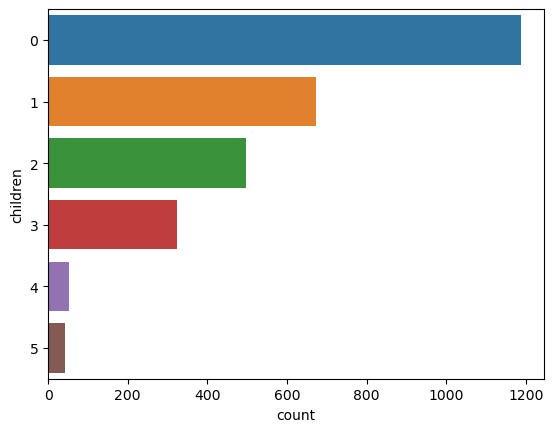

In [26]:
sns.countplot(y = df["children"])

In [27]:
df["smoker"].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [28]:
df["smoker"].replace({"no":0, "yes":1}, inplace = True)

In [29]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,southeast,8569.86180
2768,21,1,34.600,0,0,southwest,2020.17700
2769,19,0,26.030,1,1,northwest,16450.89470
2770,23,0,18.715,0,0,northwest,21595.38229


<Axes: xlabel='count', ylabel='smoker'>

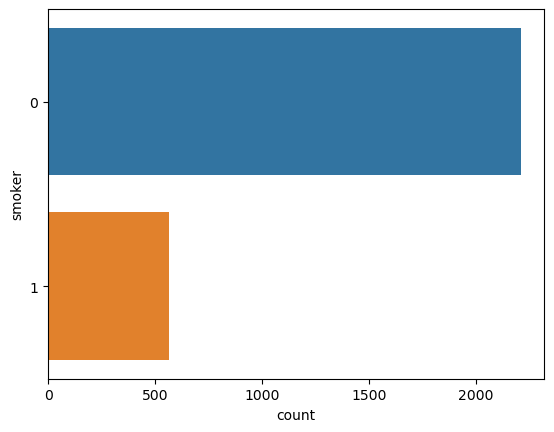

In [31]:
sns.countplot(y = df["smoker"])

In [32]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df["region"].replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}, inplace=True)

In [34]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,2,8569.86180
2768,21,1,34.600,0,0,1,2020.17700
2769,19,0,26.030,1,1,3,16450.89470
2770,23,0,18.715,0,0,3,21595.38229


<Axes: xlabel='region', ylabel='count'>

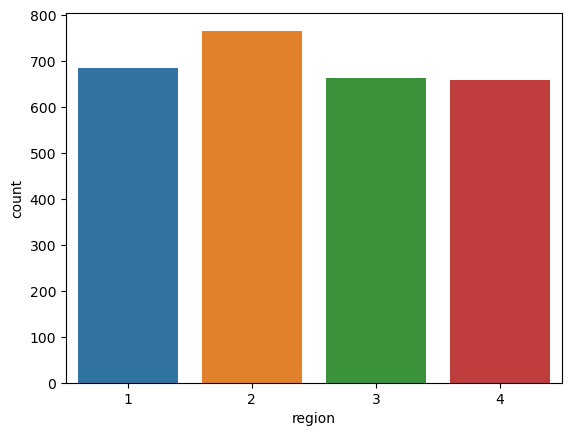

In [35]:
sns.countplot(x = df["region"])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [61]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.492785,30.690242,1.101732,0.203463,2.467532,13261.369959
std,14.081459,0.500038,6.094852,1.214806,0.402647,1.103467,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,2.000000,4687.797000
50%,39.000000,0.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,3.000000,16577.779500
max,64.000000,1.000000,47.595000,5.000000,1.000000,4.000000,63770.428010


In [60]:
# checking of correlation

df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.026046,0.115491,0.037574,-0.023286,-0.000932,0.298624
sex,0.026046,1.000000,-0.041485,-0.016020,-0.082326,0.004808,-0.062837
bmi,0.115491,-0.041485,1.000000,-0.000713,0.011008,-0.159411,0.200457
children,0.037574,-0.016020,-0.000713,1.000000,0.006362,-0.016111,0.066442
smoker,-0.023286,-0.082326,0.011008,0.006362,1.000000,0.006751,0.788783
region,-0.000932,0.004808,-0.159411,-0.016111,0.006751,1.000000,0.013530
charges,0.298624,-0.062837,0.200457,0.066442,0.788783,0.013530,1.000000


<Axes: >

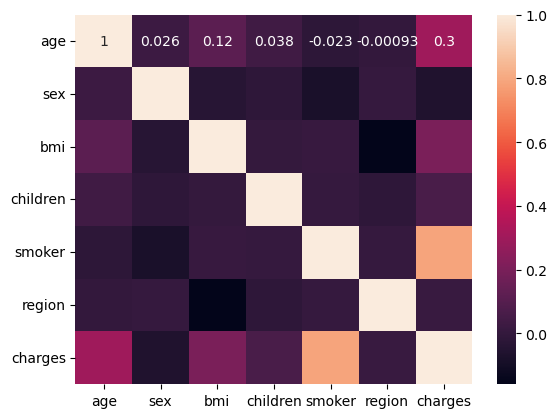

In [62]:
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='sex', ylabel='smoker'>

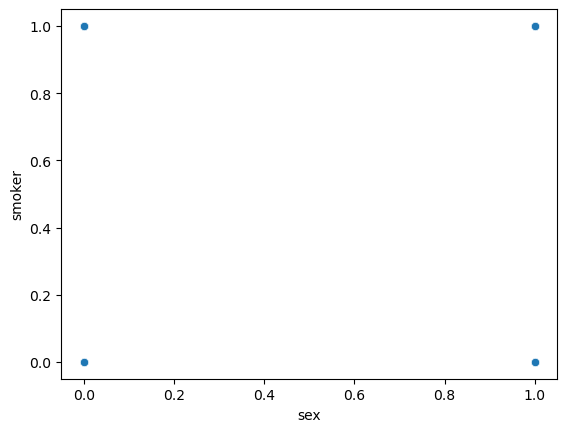

In [68]:
# bivariate analysis 

sns.scatterplot(x = df["sex"], y = df["smoker"])

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

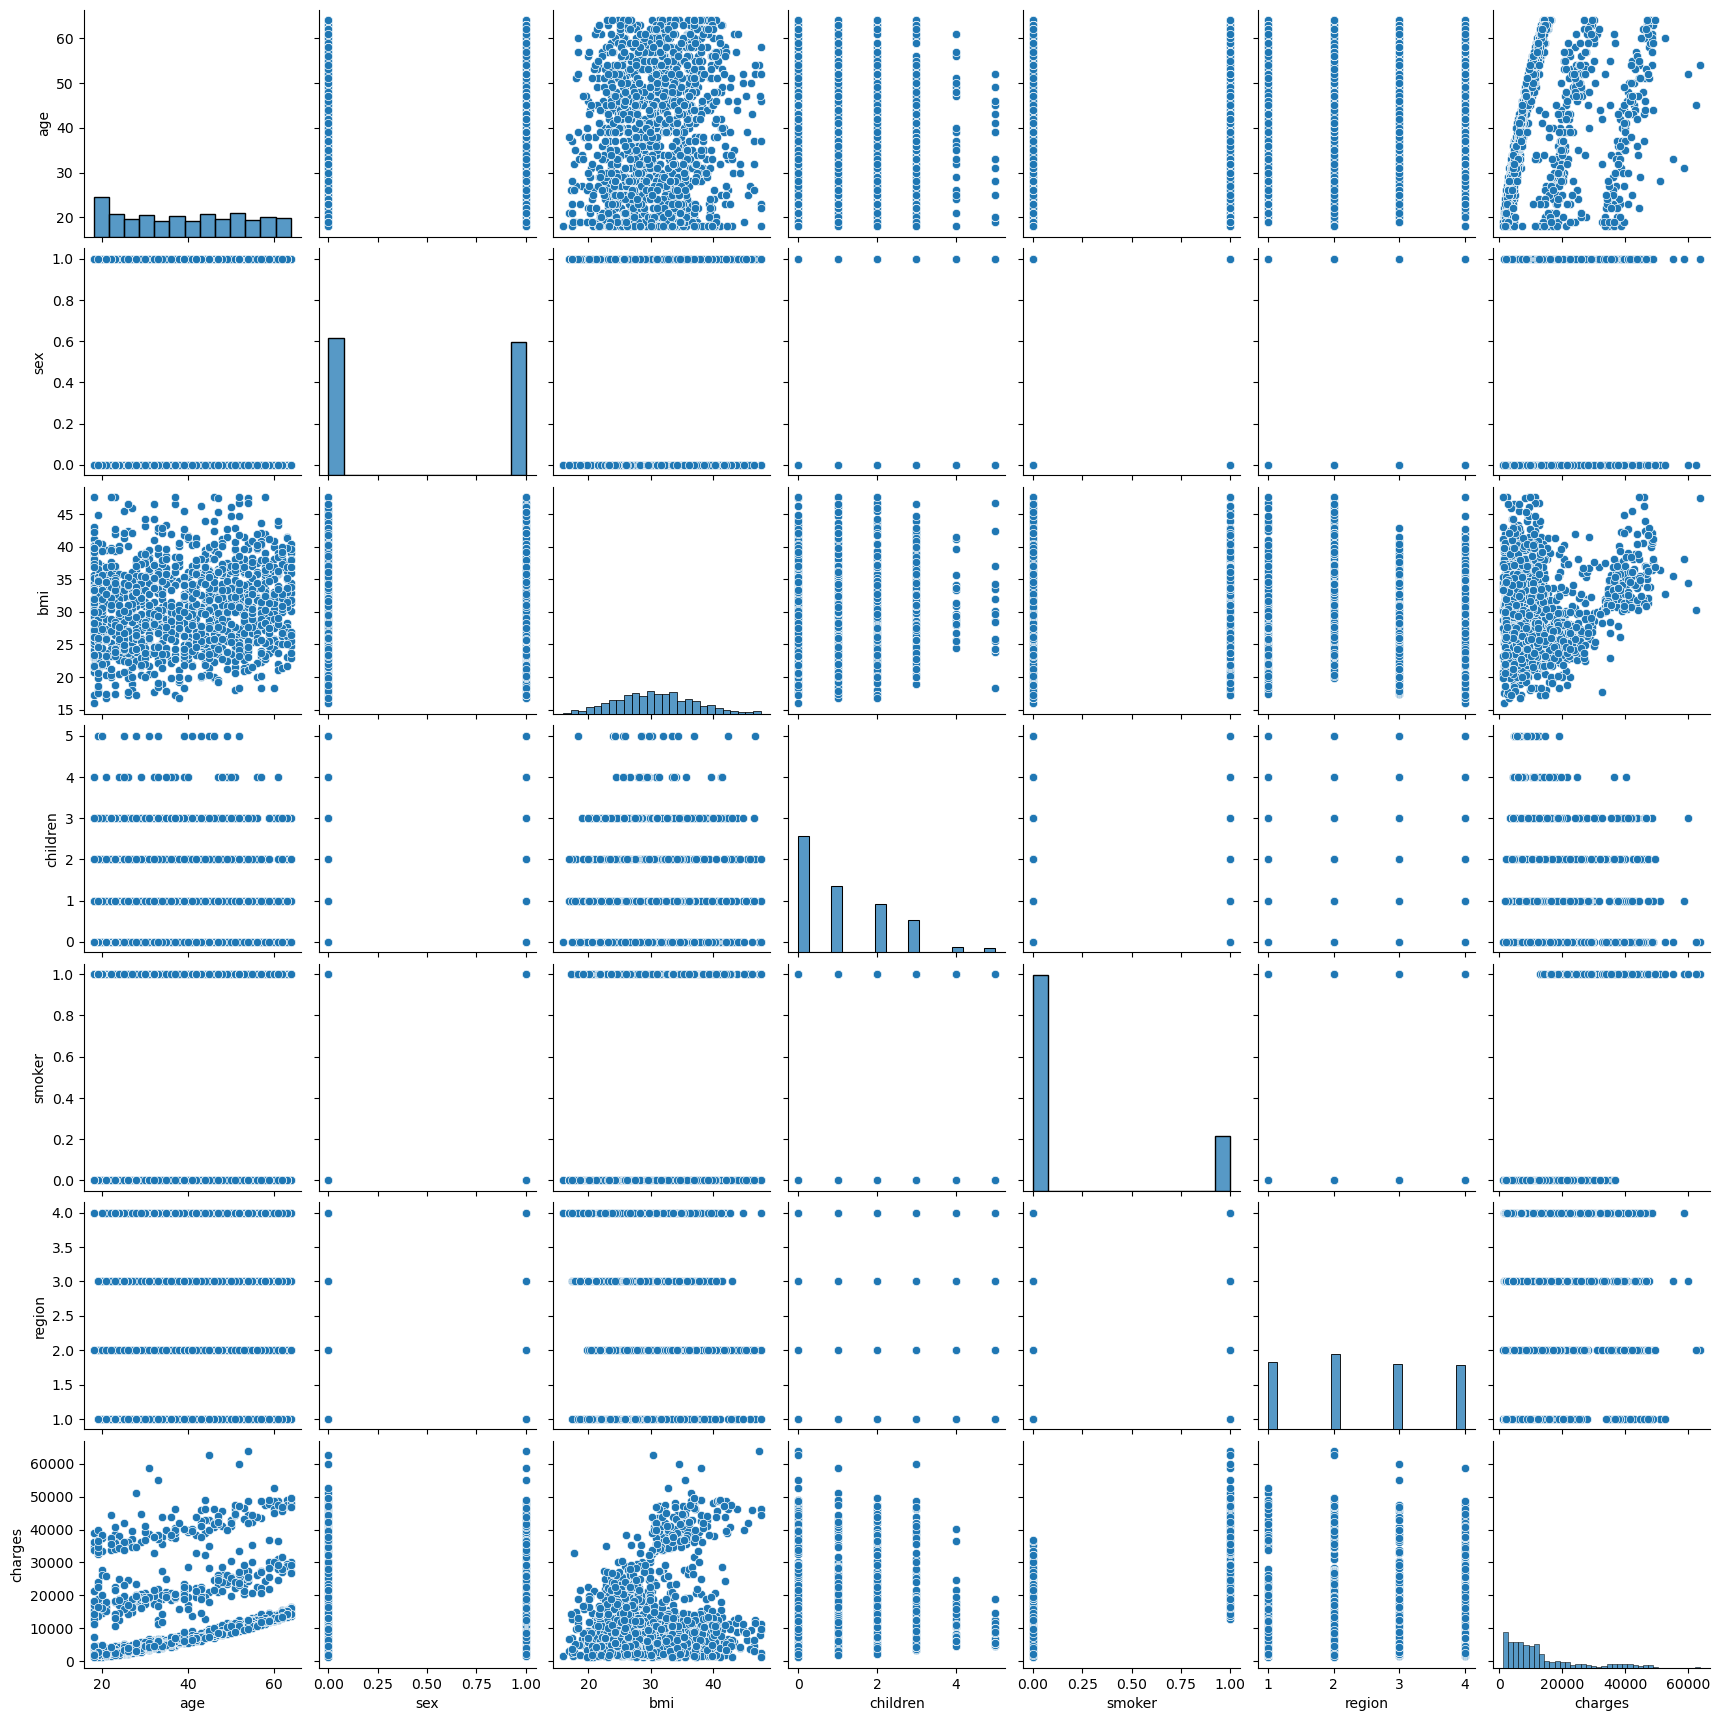

In [63]:
# multivariate analysis

sns.pairplot(df)